## Scaling estimates figure

In [1]:
#import gsw as sw # Gibbs seawater package

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.gridspec as gspec
%matplotlib inline
from matplotlib.ticker import FormatStrFormatter
from netCDF4 import Dataset
import numpy as np
import os
import pandas as pd
import seaborn as sns
import sys
import scipy.stats
import warnings
warnings.filterwarnings("ignore")
import xarray as xr

import canyon_tools.readout_tools as rout 
import canyon_tools.metrics_tools as mpt

In [2]:
sns.set_context('talk')
sns.set_style('white')

In [3]:
CanyonGrid='/data/kramosmu/results/TracerExperiments/CNTDIFF/run38/gridGlob.nc'
CanyonGridOut = Dataset(CanyonGrid)

CanyonGridNoC='/data/kramosmu/results/TracerExperiments/CNTDIFF/run68/gridGlob.nc'
CanyonGridOutNoC = Dataset(CanyonGridNoC)

CanyonState='/data/kramosmu/results/TracerExperiments/CNTDIFF/run38/stateGlob.nc'
CanyonStateOut = Dataset(CanyonState)

# Grid variables
nx = 616
ny = 360
nz = 90
nt = 19 # t dimension size 
time = CanyonStateOut.variables['T']

In [4]:
# Constants and scales

L = 6400.0 # canyon length
R = 5000.0 # Upstream radius of curvature
g = 9.81 # accel. gravity
Wsb = 13000 # Width at shelf break
Hs = 147.5 # Shelf break depth
s = 0.005 # shelf slope 
W = 8300 # mid-length width
Hh= 97.5 # head depth
Hr = 132.0 # rim depth at DnS
# NOTE: The default values of all functions correspond to the base case

def Dh(f=9.66E-4,L=6400.0,N=5.5E-3):
    '''Vertical scale Dh'''
    return((f*L)/(N))
    
def Ro(U=0.37,f=9.66E-4,R=5000.0):
    '''Rossby number using radius of curvature as length scale'''
    return(U/(f*R))

def F(Ro):
    '''Function that estimates the ability of the flow to follow isobaths'''
    return(Ro/(0.9+Ro))

def Bu(N=5.5E-3,f=9.66E-5,W=8300,Hs=147.5):
    '''Burger number'''
    return(N*Hs/(f*W))

def RossbyRad(N=5.5E-3,Hs=150.0,f=9.66E-4):
    '''1st Rossby radius of deformation'''
    return(N*Hs/f)

In [5]:
# Information for all runs is stored in canyon_records.py
lib_path = os.path.abspath('/ocean/kramosmu/OutputAnalysis/outputanalysisnotebooks/PythonScripts/Paper1Figures/') # Add absolute path to my python scripts
sys.path.append(lib_path)

import canyon_records 

records = canyon_records.main()

### Not all runs are used to fit the data and find the fitting constants:

**records_dyn** has all runs where f, N or U vary. USe this list to fit upwelling flux $\Phi$ and modify *Howatt and Allen 2013*.

**records_step** has all runs in records_dyn plus the runs with a step Kv profile. Use this list to fit $\Phi$ with scaled N.

**records_kv** has all runs with step Kv profile. Use this list to fit N below for step Kv runs.

**records_nokv** has all runs except the ones with step Kv profile. Use this list to fit N below.

In [14]:
# Indices of all runs that will be consdered for paper 1

select_rec = [0,1,2,3,4,5,6,7,8,9,17,18,19,20,
              21,22,23,24,25,26,27,28,29,30,31,32,
              33,34,37,38,40,41,42,43,44,45,46,47,48]

In [15]:
# records_dyn has all the runs without the ones where K_bg changes. Use these ones for fitting the data HA2013
ind = [0,3,4,5,6,7,8,9,17,18,19,20,21]
records_dyn = []
for ii in ind:
    records_dyn.append(records[ii])

# records_step has all the runs in records_dyn plus the step runs (use these to fit Phi with Nmean)
ind = [0,3,4,5,6,7,8,9,17,18,19,20,21,28,32,37,38,44,45,46,47,48]
records_step = []
for ii in ind:
    records_step.append(records[ii])

# records_kv has the runs with step kv profile
ind = [28,32,37,38,44,45,46,47,48] 

records_kv = []
for ii in ind:
    records_kv.append(records[ii])

# records_nokv has the runs without step kv profile
ind = [0,1,2,3,4,5,6,7,8,9,17,18,19,20,21,22,23,24,25,26,27,29,30,31,33,34,40,41,42,43]
       
records_nokv = []
for ii in ind:
    records_nokv.append(records[ii])

# records3 has all the runs without the ones where K_bg changes and run with low U high N.
ind = [0,3,4,5,6,7,8,9,17,18,19,21]
records3 = []
for ii in ind:
    records3.append(records[ii])

# records4 has all the runs without Asc bott that has N below NaN, and Kv can runs
ind = [0,3,4,5,6,7,8,9,17,18,19,20,21,22,23,24,25,26,28]
records4 = []
for ii in ind:
    records4.append(records[ii])


In [16]:
records_sel = []

for ind in select_rec:
    records_sel.append(records[ind])
    file = ('/data/kramosmu/results/TracerExperiments/%s/HCW_TrMass_%s%s.csv' %(records[ind].exp_code,
                                                                                records[ind].exp_code,
                                                                                records[ind].run_num))
    dfcan = pd.read_csv(file)
    records[ind].HCW = dfcan['HCW']
    records[ind].HCWTr1 = dfcan['HCWTr1']
    records[ind].TrMass = dfcan['TrMassHCW']
    records[ind].TrMassTr1 = dfcan['TrMassHCWTr1']
    records[ind].TrMassTr2 = dfcan['TrMassHCWTr2']
    records[ind].TrMassTot = dfcan['TotTrMass']
    records[ind].TrMassTotTr2 = dfcan['TotTrMassTr2']
    records[ind].TrMassTotTr1 = dfcan['TotTrMassTr1']
    print(ind, records[ind].exp_code)

0 CNTDIFF
1 CNTDIFF
2 CNTDIFF
3 CNTDIFF
4 CNTDIFF
5 CNTDIFF
6 CNTDIFF
7 CNTDIFF
8 CNTDIFF
9 CNTDIFF
17 LOWER_BF
18 LOW_BF
19 LOWEST_BF
20 LOWEST_BF
21 LOWEST_BF
22 LOWEST_BF
23 LOWEST_BF
24 3DVISC_REALISTIC
25 3DVISC_REALISTIC
26 3DVISC_REALISTIC
27 3DVISC_REALISTIC
28 3DVISC_REALISTIC
29 3DVISC_REALISTIC
30 3DVISC_REALISTIC
31 3DVISC_REALISTIC
32 3DVISC_REALISTIC
33 3DVISC_REALISTIC
34 3DVISC_REALISTIC
37 3DVISC_REALISTIC
38 3DVISC_REALISTIC
40 3DVISC_REALISTIC
41 3DVISC_REALISTIC
42 3DVISC_REALISTIC
43 3DVISC_REALISTIC
44 3DVISC_REALISTIC
45 3DVISC_REALISTIC
46 3DVISC_REALISTIC
47 3DVISC_REALISTIC
48 3DVISC_REALISTIC


In [17]:
keys2 = ['N_tt16','N_tt18']
stname = 'UwH' # Station at downstream head side of canyon

for ind in select_rec:
    
    filename1 = ('/ocean/kramosmu/OutputAnalysis/outputanalysisnotebooks/results/metricsDataFrames/N_%s_%s.csv' %
                 (records[ind].name,stname))
    df = pd.read_csv(filename1)
    Nab = 0
    Nbe = 0
    Nrim = 0 
    Nmean = 0
          
    for key,ii in zip(keys2, range(len(keys2))):
        Nab = Nab + np.max(df[keys2[ii]][0:20]) #0:20
        Nbe = Nbe + np.min(df[keys2[ii]][20:24]) #20:24
        Nmean = Nmean + np.mean(df[keys2[ii]][20:24])
        Nrim = Nrim + df[keys2[ii]][24]
    records[ind].Nab_h = Nab/  len(keys2)
    records[ind].Nbe_h = Nbe/  len(keys2)

OSError: File b'/ocean/kramosmu/OutputAnalysis/outputanalysisnotebooks/results/metricsDataFrames/N_3DVISC_REALISTIC_run15_UwH.csv' does not exist

In [18]:
# Save mean maximum N of days 3-6 and std for each run.

keys = ['N2_tt08','N2_tt10','N2_tt12','N2_tt14','N2_tt16',]
key0 = 'N2_tt00'
stname = 'DnC' # Station at downstream side of canyon

for record in records_sel:
    
    filename1 = ('/ocean/kramosmu/OutputAnalysis/outputanalysisnotebooks/results/metricsDataFrames/N2_%s_%s.csv' %
                 (record.name,stname))
    df = pd.read_csv(filename1)
    
    df_anom=(df.sub(df[key0].squeeze(),axis=0)).add(df[key0][0])
    
    maxd3 = max(df_anom[keys[0]][26:])   # 22:26 for other scaling
    maxd4 = max(df_anom[keys[1]][26:])   
    maxd5 = max(df_anom[keys[2]][26:])   
    maxd6 = max(df_anom[keys[3]][26:])   
    maxd7 = max(df_anom[keys[4]][26:])   
    
    record.maxN = np.mean(np.array([maxd3,maxd4,maxd5,maxd6,maxd7]))
    record.stdN = np.std(np.array([maxd3,maxd4,maxd5,maxd6,maxd7]))
  
    maxd3a = max(df_anom[keys[0]][22:26])   # 22:26 for other scaling
    maxd4a = max(df_anom[keys[1]][22:26])   
    maxd5a = max(df_anom[keys[2]][22:26])   
    maxd6a = max(df_anom[keys[3]][22:26])   
    maxd7a = max(df_anom[keys[4]][22:26])   
    
    record.maxNabove = np.mean(np.array([maxd3a,maxd4a,maxd5a,maxd6a,maxd7a]))
    record.stdNabove = np.std(np.array([maxd3a,maxd4a,maxd5a,maxd6a,maxd7a]))

OSError: File b'/ocean/kramosmu/OutputAnalysis/outputanalysisnotebooks/results/metricsDataFrames/N2_CNTDIFF_run79_DnC.csv' does not exist

In [19]:
# Save mean maximum N of days 3-6 and std for each run.

keys = ['dTrdz_tt08','dTrdz_tt10','dTrdz_tt12','dTrdz_tt14','dTrdz_tt16']
key0 = 'dTrdz_tt00'
stname = 'DnC' # Station at downstream side of canyon

for record in records_sel:
    
    filename1 = ('/ocean/kramosmu/OutputAnalysis/outputanalysisnotebooks/results/metricsDataFrames/dTr1dz_%s_%s.csv' %
                 (record.name,stname))
    df = pd.read_csv(filename1)
    
    df_anom=(df.sub(df[key0].squeeze(),axis=0)).add(df[key0][0])
        
    maxd3 = min(df_anom[keys[0]][22:26])   
    maxd4 = min(df_anom[keys[1]][22:26])   
    maxd5 = min(df_anom[keys[2]][22:26])   
    maxd6 = min(df_anom[keys[3]][22:26])   
    maxd7 = min(df_anom[keys[4]][22:26])   
    
 
    record.maxdTrdz = np.mean(np.array([maxd3,maxd4,maxd5,maxd6,maxd7]))
    record.stddTrdz = np.std(np.array([maxd3,maxd4,maxd5,maxd6,maxd7]))
    record.inidTrdz = df[key0][30]
print('The initial tracer gradient is %f ' %(-1*record.inidTrdz))

OSError: File b'/ocean/kramosmu/OutputAnalysis/outputanalysisnotebooks/results/metricsDataFrames/dTr1dz_CNTDIFF_run79_DnC.csv' does not exist

In [20]:
keys = ['Tr_profile_tt08','Tr_profile_tt10','Tr_profile_tt12','Tr_profile_tt14','Tr_profile_tt16']
key0 = 'Tr_profile_tt00'
stname = 'DnC' # Station at downstream side of canyon

for record in records_sel:
    
    filename1 = ('/ocean/kramosmu/OutputAnalysis/outputanalysisnotebooks/results/metricsDataFrames/Tr1_profile_%s_%s.csv' % (record.name,stname))
    df = pd.read_csv(filename1)
    df_anom=(df.sub(df[key0].squeeze(),axis=0))
    maxd4 = np.mean(df[keys[0]][25:32])   
    maxd5 = np.mean(df[keys[1]][25:32])   
    maxd6 = np.mean(df[keys[2]][25:32]) 
    maxd7 = np.mean(df[keys[3]][25:32])  
    maxd8 = np.mean(df[keys[4]][25:32])  
    
    maxd0 = df[key0][29]
    
    record.maxTr = np.mean(np.array([maxd4,maxd5,maxd6,maxd7,maxd8]))
    record.stdTr = np.std(np.array([maxd4,maxd5,maxd6,maxd7,maxd8]))
    record.TrSB = maxd0

Ctop = df[key0][0]

OSError: File b'/ocean/kramosmu/OutputAnalysis/outputanalysisnotebooks/results/metricsDataFrames/Tr1_profile_CNTDIFF_run79_DnC.csv' does not exist

## Re-fit HA2013
(They may have had recirculation)

In [21]:
# records_dyn has all runs where Kv does not change, only N, f, U

for param in np.linspace(0.8, 1.2, 30):
    for rec in records_dyn:

        Se = (s*rec.N)/(rec.f*((F(Ro(rec.u_mod,rec.f,W))/Ro(rec.u_mod,rec.f,L))**(1/2)))
        rec.X = (F(Ro(rec.u_mod,rec.f,W))**(3/2))*(Ro(rec.u_mod,rec.f,L)**(1/2))*((1-param*Se)**3)

        can_eff = rec.HCW
        Phi = np.mean(np.array([(can_eff[ii]-can_eff[ii-1])/(time[ii]-time[ii-1]) for ii in range (8,18)]))
        Phi_std = np.std(np.array([(can_eff[ii]-can_eff[ii-1])/(time[ii]-time[ii-1]) for ii in range (8,18)]))
        
        rec.Phi = Phi
        rec.Phi_std = Phi_std
        rec.Phi_nonDim = rec.Phi/(rec.u_mod*W*Dh(rec.f,L,rec.N))

    Y_array = np.array([rec.Phi_nonDim for rec in records_dyn])
    X_array = np.array([rec.X for rec in records_dyn])

    slope0, intercept0, r_value0, p_value0, std_err0 = scipy.stats.linregress(X_array,Y_array)

    print('Using parameter %1.2f: slope = %1.2f, intercept = %1.3f, r-value = %1.3f' %(param, slope0, intercept0, r_value0))

Using parameter 0.80: slope = 2.76, intercept = -0.020, r-value = 0.941
Using parameter 0.81: slope = 2.84, intercept = -0.020, r-value = 0.945
Using parameter 0.83: slope = 2.92, intercept = -0.020, r-value = 0.949
Using parameter 0.84: slope = 3.00, intercept = -0.020, r-value = 0.953
Using parameter 0.86: slope = 3.08, intercept = -0.021, r-value = 0.957
Using parameter 0.87: slope = 3.16, intercept = -0.021, r-value = 0.960
Using parameter 0.88: slope = 3.24, intercept = -0.021, r-value = 0.963
Using parameter 0.90: slope = 3.33, intercept = -0.021, r-value = 0.966
Using parameter 0.91: slope = 3.41, intercept = -0.021, r-value = 0.969
Using parameter 0.92: slope = 3.50, intercept = -0.021, r-value = 0.972
Using parameter 0.94: slope = 3.58, intercept = -0.021, r-value = 0.974
Using parameter 0.95: slope = 3.67, intercept = -0.020, r-value = 0.976
Using parameter 0.97: slope = 3.76, intercept = -0.020, r-value = 0.978
Using parameter 0.98: slope = 3.85, intercept = -0.020, r-value 

I got the largest r-value (0.984) for parameter values 1.05 and 1.06.  

In [22]:
param = 1.05

for rec in records_dyn:

    Se = (s*rec.N)/(rec.f*((F(Ro(rec.u_mod,rec.f,W))/Ro(rec.u_mod,rec.f,L))**(1/2)))
    rec.X = (F(Ro(rec.u_mod,rec.f,W))**(3/2))*(Ro(rec.u_mod,rec.f,L)**(1/2))*((1-param*Se)**3)

    can_eff = rec.HCW
    Phi = np.mean(np.array([(can_eff[ii]-can_eff[ii-1])/(time[ii]-time[ii-1]) for ii in range (8,18)]))
    Phi_std = np.std(np.array([(can_eff[ii]-can_eff[ii-1])/(time[ii]-time[ii-1]) for ii in range (8,18)]))
    
    rec.Phi = Phi
    rec.Phi_std = Phi_std
    rec.Phi_nonDim = rec.Phi/(rec.u_mod*W*Dh(rec.f,L,rec.N))

Y_array = np.array([rec.Phi_nonDim for rec in records_dyn])
X_array = np.array([rec.X for rec in records_dyn])

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(X_array,Y_array)
print('Using parameter %1.2f: slope = %1.2f, intercept = %1.3f, r-value = %1.3f' %(param, slope, intercept, r_value))

Using parameter 1.05: slope = 4.31, intercept = -0.017, r-value = 0.984


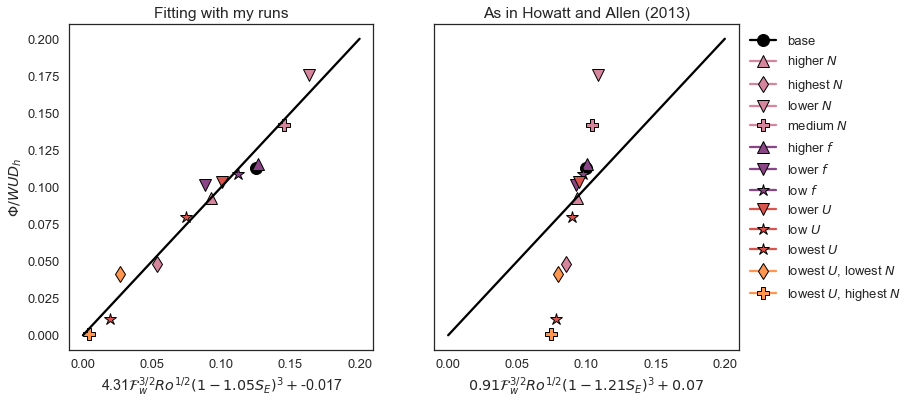

In [23]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,6), sharey=True)

for rec in records_dyn:
    
    ax1.plot(slope*rec.X+intercept,rec.Phi_nonDim, 
             marker = rec.mstyle,markersize = 12,
             color = sns.xkcd_rgb[rec.color2],
             markeredgewidth=1.0,
             markeredgecolor = 'k',
             label=rec.label)
    
    ax2.plot(0.91*rec.X+0.07,rec.Phi_nonDim, 
             marker = rec.mstyle,markersize = 12,
             color = sns.xkcd_rgb[rec.color2],
             markeredgewidth=1.0,
             markeredgecolor = 'k',
             label=rec.label)

xx = np.linspace(0,0.2,50)
ax1.plot(xx,xx,'k-')
ax2.plot(xx,xx,'k-')

ax1.set_ylabel('$\Phi/WUD_h$')
ax1.set_xlabel(r'%1.2f$\mathcal{F}_w^{3/2}Ro^{1/2}(1-%1.2f S_E)^3+$%1.3f' %(slope,param, intercept))
ax2.set_xlabel(r'$0.91\mathcal{F}_w^{3/2}Ro^{1/2}(1-1.21S_E)^3+0.07$')

ax1.set_title('Fitting with my runs')
ax2.set_title(r'As in Howatt and Allen (2013)')

ax2.legend(bbox_to_anchor=(1.0,1),ncol=1, columnspacing=0.1)

#### So, the modified scaling for upwelling flux $\Phi$ is: $$4.31\mathcal{F}_w^{3/2}Ro^{1/2}(1-1.05S_E)^3-0.017$$

### How does the scaling work for all runs?

The rms error for N/No above is 0.149628
The rms error for N/N0 below is 1.060641
The rms error for dTr/dTr0 above is 0.149204
The rms error for C/Co is 0.001293
The rms error for Phi is 0.099300
The rms error for PhiTr/1E5 above is 0.186555


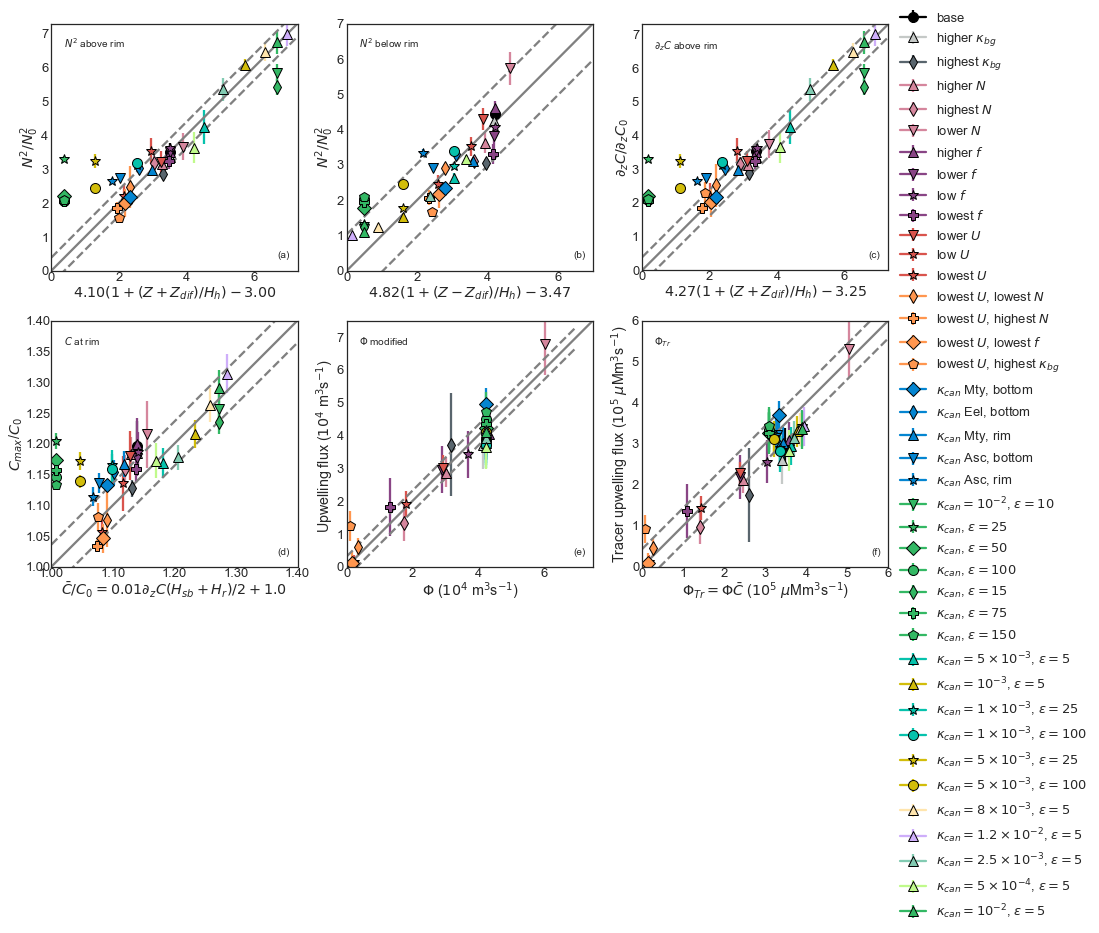

In [29]:
plt.rcParams['font.size'] = 8.0
f = plt.figure(figsize = (15,10)) # 190mm = 7.48 in, 230cm = 9.05in

gs = gspec.GridSpec(2, 3)
ax0 = plt.subplot(gs[0,0])
ax1 = plt.subplot(gs[0,1])
ax2 = plt.subplot(gs[0,2])
ax3 = plt.subplot(gs[1,0])
ax4 = plt.subplot(gs[1,1])
ax5 = plt.subplot(gs[1,2])

t=6.5 # days

# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% N/No above %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
for rec in records_kv:
    
    Z = ((rec.f*rec.u_mod*F(Ro(rec.u_mod,rec.f,R))*L)**(0.5))/rec.N
    Zdif = np.sqrt(t*3600*24*(rec.kv-rec.kbg)) 
    
    rec.Z = Z
    rec.Zdif = Zdif
    
    plt1 = ax0.errorbar((4.10*(1+(Z+Zdif)/Hh))-3.00,rec.maxNabove/(rec.N**2),
                        yerr = rec.stdNabove/(rec.N**2), # since rec.N is a constant
                        marker = rec.mstyle,
                        markersize = 10,
                        color = sns.xkcd_rgb[rec.color2],
                        markeredgewidth=1.0,
                        markeredgecolor = 'k',
                        label=rec.label)
    rec.N_ab = (((4.10*(1+(Z+Zdif)/Hh))-3.00)*rec.N**2)**(0.5)

for rec in records_nokv:
    Z = ((rec.f*rec.u_mod*F(Ro(rec.u_mod,rec.f,R))*L)**(0.5))/rec.N
    Zdif = np.sqrt(t*3600*24*(rec.kv-rec.kbg)) 
    
    rec.Z = Z
    rec.Zdif = Zdif
    
    plt1 = ax0.errorbar((4.10*(1+(Z-Zdif)/Hh))-3.00,rec.maxNabove/(rec.N**2),
                        yerr = rec.stdNabove/(rec.N**2), # since rec.N is a constant
                        marker = rec.mstyle,
                        markersize = 10,
                        color = sns.xkcd_rgb[rec.color2],
                        markeredgewidth=1.0,
                        markeredgecolor = 'k',
                        label=rec.label)
    rec.N_ab = (((4.10*(1+(Z-Zdif)/Hh))-3.00)*rec.N**2)**(0.5)

ax0.set_ylabel('$N^2/N^2_0$',labelpad=0.5)
ax0.set_xlabel(r'$4.10(1+(Z+Z_{dif})/H_h)-3.00$',labelpad=0.5)

maxN_array_Kv = np.array([rec.maxNabove/(rec.N**2) for rec in records_step])
tilt_array_Kv = np.array([1+(rec.Z+rec.Zdif)/Hh for rec in records_step])
x_fit = np.linspace(0.0, 7.3, 50)

mean_sq_err = np.mean(((maxN_array_Kv)-(4.10*tilt_array_Kv-3.00))**2)
upper_bound = ax0.plot(x_fit,x_fit+(mean_sq_err)**(0.5),linestyle = '--',color='0.5')
lower_bound = ax0.plot(x_fit,x_fit-(mean_sq_err)**(0.5),linestyle = '--',color='0.5')
print('The rms error for N/No above is %f' %mean_sq_err)

ax0.plot(np.linspace(0, 7.3, 50),np.linspace(0.0, 7.3, 50),'-', color='0.5')
ax0.set_ylim(0.0,7.3)
ax0.set_xlim(0.0,7.3)

ax0.text(0.92,0.05,'(a)',transform=ax0.transAxes,fontsize=10)
ax0.text(0.05,0.9,'$N^2$ above rim',transform=ax0.transAxes,fontsize=10)
#ax0.set_aspect(1)

# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% N/No below %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

for rec in records_sel:
    plt1 = ax1.errorbar((4.82*(1+(rec.Z-rec.Zdif)/Hh))-3.47,rec.maxN/(rec.N**2),
                        yerr = rec.stdN/(rec.N**2), # since rec.N is a constant
                        marker = rec.mstyle,
                        markersize = 10,
                        color = sns.xkcd_rgb[rec.color2],
                        markeredgewidth=1.0,
                        markeredgecolor = 'k',
                        label=rec.label)
    rec.N_sc = (((4.82*(1+(rec.Z-rec.Zdif)/Hh))-3.47)*rec.N**2)**0.5
ax1.set_ylabel('$N^2/N^2_0$',labelpad=0.5)
ax1.set_xlabel(r'$4.82(1+(Z-Z_{dif})/H_h)-3.47$',labelpad=0.5)

maxN_array = np.array([rec.maxN/(rec.N**2) for rec in records_step])
tilt_array = np.array([((rec.Z-rec.Zdif)/Hh) for rec in records_step])
x_fit = np.linspace(0, 7, 50)

mean_sq_err = np.mean(((maxN_array_Kv)-(4.82*tilt_array_Kv-3.47))**2)

upper_bound = ax1.plot(x_fit,x_fit+(mean_sq_err)**(0.5),linestyle = '--',color='0.5')
lower_bound = ax1.plot(x_fit,x_fit-(mean_sq_err)**(0.5),linestyle = '--',color='0.5')
print('The rms error for N/N0 below is %f' %mean_sq_err)

ax1.plot(np.linspace(0, 7, 50),np.linspace(0, 7, 50),'-', color='0.5')
ax1.set_ylim(0,7)
ax1.set_xlim(0,7)
ax1.text(0.92,0.05,'(b)',transform=ax1.transAxes,fontsize=10)
ax1.text(0.05,0.9,'$N^2$ below rim',transform=ax1.transAxes,fontsize=10)
#ax1.set_aspect(1)

# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% dTr/dz %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
ax2.plot(np.linspace(0,7.3, 50),np.linspace(0,7.3, 50),'-', color='0.5')

for rec in records_kv:
    
    plt1 = ax2.errorbar(4.17*(1+(rec.Z+rec.Zdif)/Hh)-3.25,rec.maxdTrdz/rec.inidTrdz,
                        yerr = rec.stddTrdz/rec.inidTrdz, # since rec.N is a constant
                        marker = rec.mstyle,
                        markersize = 10,
                        color = sns.xkcd_rgb[rec.color2],
                        markeredgewidth=1.0,
                        markeredgecolor = 'k',
                        label=rec.label)
    rec.dTrdz = -(4.17*(1+(rec.Z+rec.Zdif)/Hh)-3.25)*rec.inidTrdz
    ax2.set_ylabel('$\partial_zC/\partial_zC_0$',labelpad=0.5)
    ax2.set_xlabel(r'$4.27(1+(Z+Z_{dif})/H_h)-3.25$',labelpad=0.5)

for rec in records_nokv:
    
    plt1 = ax2.errorbar(4.17*(1+(rec.Z-rec.Zdif)/Hh)-3.25,rec.maxdTrdz/rec.inidTrdz,
                        yerr = rec.stddTrdz/rec.inidTrdz, # since rec.N is a constant
                        marker = rec.mstyle,
                        markersize = 10,
                        color = sns.xkcd_rgb[rec.color2],
                        markeredgewidth=1.0,
                        markeredgecolor = 'k',
                        label=rec.label)
    rec.dTrdz = -(4.17*(1+(rec.Z-rec.Zdif)/Hh)-3.25)*rec.inidTrdz
    ax2.set_ylabel('$\partial_zC/\partial_zC_0$',labelpad=0.5)
    ax2.set_xlabel(r'$4.27(1+(Z+Z_{dif})/H_h)-3.25$',labelpad=0.5)

maxN_array = np.array([rec.maxdTrdz/(rec.inidTrdz) for rec in records_step])
tilt_array = np.array([((rec.Z-rec.Zdif)/Hh) for rec in records_step])
x_fit = np.linspace(0, 7.3, 50)

mean_sq_err = np.mean(((maxN_array_Kv)-(4.17*tilt_array_Kv-3.25))**2)

upper_bound = ax2.plot(x_fit,x_fit+(mean_sq_err)**(0.5),linestyle = '--',color='0.5')
lower_bound = ax2.plot(x_fit,x_fit-(mean_sq_err)**(0.5),linestyle = '--',color='0.5')
print('The rms error for dTr/dTr0 above is %f' %mean_sq_err)
    
    
ax2.text(0.92,0.05,'(c)',transform=ax2.transAxes,fontsize=10)
ax2.text(0.05,0.9,'$\partial_zC$ above rim',transform=ax2.transAxes,fontsize=10)

ax2.set_ylim(0,7.3)
ax2.set_xlim(0,7.3)
ax2.set_aspect(1)


# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% Tracer Conc %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
ax3.plot(np.linspace(1,1.4, 50),np.linspace(1,1.4, 50),'-', color='0.5')

for rec in records_sel:
     
    plt1 = ax3.errorbar((0.01*(rec.dTrdz*(Hh+132.0)/2.0)) + 1.00,rec.maxTr/rec.TrSB,
                        yerr = rec.stdTr/rec.TrSB,
                        marker = rec.mstyle,
                        markersize = 10,
                        color = sns.xkcd_rgb[rec.color2],
                        markeredgewidth=1.0,
                        markeredgecolor = 'k',
                        label=rec.label)
    
    #ax3.set_title('Max tracer concetration between head nad sh, Dn')
    ax3.set_ylabel('$C_{max}$/$C_{0}$',labelpad=0.5)
    ax3.set_xlabel(r'$\bar{C}/C_{0}=%1.2f\partial_zC(H_{sb}+H_r)/2+%1.1f$' %((0.01),(1.00)),labelpad=0.5)
    rec.Cbar = ((0.01*(rec.dTrdz*(Hh+132.0)/2.0)) + 1.00)*rec.TrSB
fmt = FormatStrFormatter('%1.2f')
ax3.xaxis.set_major_formatter(fmt)
ax3.yaxis.set_major_formatter(fmt)

ax3.tick_params(axis='x', pad=1)
ax3.tick_params(axis='y', pad=1)

maxN_array = np.array([rec.maxTr/rec.TrSB for rec in records_step])
tilt_array = np.array([(0.01*(rec.dTrdz*(Hh+132.0)/2.0))+1.00 for rec in records_step])
x_fit = np.linspace(1,1.4, 50)

mean_sq_err = np.mean(((maxN_array)-(tilt_array))**2)
upper_bound = ax3.plot(x_fit,x_fit+(mean_sq_err)**(0.5),linestyle = '--',color='0.5')
lower_bound = ax3.plot(x_fit,x_fit-(mean_sq_err)**(0.5),linestyle = '--',color='0.5')
print('The rms error for C/Co is %f' %mean_sq_err)

ax3.text(0.92,0.05,'(d)',transform=ax3.transAxes,fontsize=10)
ax3.text(0.05,0.9,'$C$ at rim',transform=ax3.transAxes,fontsize=10)

ax3.set_ylim(1,1.4)
ax3.set_xlim(1,1.4)
ax3.set_aspect(1)

# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%% Phi %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
t=4
for rec in records_sel:
    
    Se = (s*rec.N)/(rec.f*((F(Ro(rec.u_mod,rec.f,W))/Ro(rec.u_mod,rec.f,L))**(1/2)))
    HA2013=((slope*(F(Ro(rec.u_mod,rec.f,W))**(3/2))*(Ro(rec.u_mod,rec.f,L)**(1/2))*((1-param*Se)**3))+intercept)
    
    can_eff = rec.HCW
    Phi = np.mean(np.array([(can_eff[ii]-can_eff[ii-1])/(time[ii]-time[ii-1]) for ii in range (8,18)]))
    Phi_std = np.std(np.array([(can_eff[ii]-can_eff[ii-1])/(time[ii]-time[ii-1]) for ii in range (8,18)]))
    
    plt1 = ax4.errorbar(HA2013*(rec.u_mod*W*Dh(rec.f,L,rec.N))/1E4,Phi/1E4,
                        yerr=Phi_std/1E4,
                        marker = rec.mstyle,
                        markersize = 10,
                        color = sns.xkcd_rgb[rec.color2],
                        markeredgewidth=1.0,
                        markeredgecolor = 'k',
                        label=rec.label)
    rec.Phi = Phi
    rec.HA2013 = HA2013*(rec.u_mod*W*Dh(rec.f,L,rec.N))

ax4.set_ylabel(r'Upwelling flux ($10^4$ m$^3$s$^{-1}$)  ',labelpad=0.5)
ax4.set_xlabel(r'$\Phi$ ($10^4$ m$^3$s$^{-1}$)',labelpad=0.5)
    
maxN_array = np.array([rec.Phi/1E4 for rec in records_step])
tilt_array = np.array([rec.HA2013/1E4 for rec in records_step])
x_fit = np.linspace(0,7, 50)

mean_sq_err = np.mean(((maxN_array)-(tilt_array))**2)
upper_bound = ax4.plot(x_fit,x_fit+(mean_sq_err)**(0.5),linestyle = '--',color='0.5')
lower_bound = ax4.plot(x_fit,x_fit-(mean_sq_err)**(0.5),linestyle = '--',color='0.5')
print('The rms error for Phi is %f' %mean_sq_err)

ax4.plot(np.linspace(0,7.5, 50),np.linspace(0,7.5, 50),'-', color='0.5')
ax4.text(0.92,0.05,'(e)',transform=ax4.transAxes,fontsize=10)
ax4.text(0.05,0.9,r'$\Phi$ modified' %slope,transform=ax4.transAxes,fontsize=10)
    
ax4.set_ylim(0,7.5)
ax4.set_xlim(0,7.5)
ax4.set_aspect(1)

    # %%%%%%%%%%%%%%%%%%%%%%%%%%%%%% Phi_Tr %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%    
for rec in records_sel:    
    
    Capprox=rec.Cbar
    
    mass_can_eff = rec.TrMass
    can_eff = rec.HCW
    
    phiTr = np.mean(np.array([(mass_can_eff[ii]-mass_can_eff[ii-1])/(time[ii]-time[ii-1]) for ii in range (8,18)]))
    phiTr_std = np.std(np.array([(mass_can_eff[ii]-mass_can_eff[ii-1])/(time[ii]-time[ii-1]) for ii in range (8,18)]))
    
    plt1 = ax5.errorbar(rec.HA2013*(Capprox)/1E5, # 1000 is a conversion factor
                        (phiTr)/1E5,
                        yerr = phiTr_std/1E5,
                        marker = rec.mstyle,
                        markersize = 10,
                        color = sns.xkcd_rgb[rec.color2],
                        markeredgewidth=1.0,
                        markeredgecolor = 'k',
                        label=rec.label)
    rec.PhiTr = (phiTr)
    rec.PhiTrScale = rec.HA2013*(Capprox)
     
ax5.set_xlabel(r'$\Phi_{Tr}=\Phi \bar{C}$ ($10^5$ $\mu$Mm$^{3}$s$^{-1}$)',labelpad=0.5)
ax5.set_ylabel(r'Tracer upwelling flux ($10^5$ $\mu$Mm$^{3}$s$^{-1}$)',labelpad=0.5)

maxN_array = np.array([rec.PhiTr/1E5 for rec in records_step])
tilt_array = np.array([rec.PhiTrScale/1E5 for rec in records_step])
x_fit = np.linspace(0,6, 50)

mean_sq_err = np.mean(((maxN_array)-(tilt_array))**2)
upper_bound = ax5.plot(x_fit,x_fit+(mean_sq_err)**(0.5),linestyle = '--',color='0.5')
lower_bound = ax5.plot(x_fit,x_fit-(mean_sq_err)**(0.5),linestyle = '--',color='0.5')
print('The rms error for PhiTr/1E5 above is %f' %mean_sq_err)

ax5.plot(np.linspace(0,6, 50),np.linspace(0,6, 50),'-', color='0.5')
ax5.text(0.93,0.05,'(f)',transform=ax5.transAxes,fontsize=10)
ax5.text(0.05,0.9,r'$\Phi_{Tr}$',transform=ax5.transAxes,fontsize=10)

ax5.set_ylim(0,6)
ax5.set_xlim(0,6)
ax5.set_aspect(1)
    
ax5.legend(bbox_to_anchor=(1.0,2.3),ncol=1, columnspacing=0.1)
    
ax0.tick_params(axis='x', pad=1)
ax1.tick_params(axis='x', pad=1)
ax2.tick_params(axis='x', pad=1)
ax4.tick_params(axis='x', pad=1)
ax5.tick_params(axis='x', pad=1)

ax0.tick_params(axis='y', pad=3)
ax1.tick_params(axis='y', pad=3)
ax2.tick_params(axis='y', pad=3)
ax4.tick_params(axis='y', pad=3)
ax5.tick_params(axis='y', pad=3)

#plt.savefig('figure9.eps',format='eps',bbox_inches='tight')



### Using scaled N below rim in the $\Phi$ scaling - still not correct

In [30]:
# Fit line to upwelling flux data

for rec in records_sel:
    
    Se = (s*rec.N)/(rec.f*((F(Ro(rec.u_mod,rec.f,W))/Ro(rec.u_mod,rec.f,L))**(1/2)))
    HA2013=((slope*(F(Ro(rec.u_mod,rec.f,W))**(3/2))*(Ro(rec.u_mod,rec.f,L)**(1/2))*((1-param*Se)**3))+intercept)
    
    can_eff = rec.HCW
    Phi = np.mean(np.array([(can_eff[ii]-can_eff[ii-1])/(time[ii]-time[ii-1]) for ii in range (8,18)]))
    Phi_std = np.std(np.array([(can_eff[ii]-can_eff[ii-1])/(time[ii]-time[ii-1]) for ii in range (8,18)]))
    rec.Phi = Phi
    rec.Phi_std = Phi_std
    rec.HA2013 = HA2013*(rec.u_mod*W*Dh(rec.f,L,(rec.Nab_h+rec.Nbe_h)))
    
phi_array = np.array([rec.Phi for rec in records_step])
tilt_array = np.array([rec.HA2013 for rec in records_step])

slope2, intercept2, r_value2, p_value2, std_err2 = scipy.stats.linregress(tilt_array,phi_array)

print(slope2, intercept2)

2.83914125415 511.680774335


CNTDIFF_run38
CNTDIFF_run37
CNTDIFF_run36
CNTDIFF_run45
CNTDIFF_run73
CNTDIFF_run75
CNTDIFF_run67
CNTDIFF_run51
CNTDIFF_run69
CNTDIFF_run71
LOWER_BF_run01
LOW_BF_run01
LOWEST_BF_run01
LOWEST_BF_run03
LOWEST_BF_run05
LOWEST_BF_run07
LOWEST_BF_run11
3DVISC_REALISTIC_run01
3DVISC_REALISTIC_run02
3DVISC_REALISTIC_run03
3DVISC_REALISTIC_run05
3DVISC_REALISTIC_run06
3DVISC_REALISTIC_run07
3DVISC_REALISTIC_run08
3DVISC_REALISTIC_run09
3DVISC_REALISTIC_run10
3DVISC_REALISTIC_run11
3DVISC_REALISTIC_run12
3DVISC_REALISTIC_run13
3DVISC_REALISTIC_run16
3DVISC_REALISTIC_run17
3DVISC_REALISTIC_run19
3DVISC_REALISTIC_run20
3DVISC_REALISTIC_run21
3DVISC_REALISTIC_run22
3DVISC_REALISTIC_run23
3DVISC_REALISTIC_run24
3DVISC_REALISTIC_run25
3DVISC_REALISTIC_run26
3DVISC_REALISTIC_run27
The rms error for C/Co is 0.004990
The rms error for Phi is 1.995956
The rms error for PhiTr/1E5 above is 1.727367
-0.0359832763672


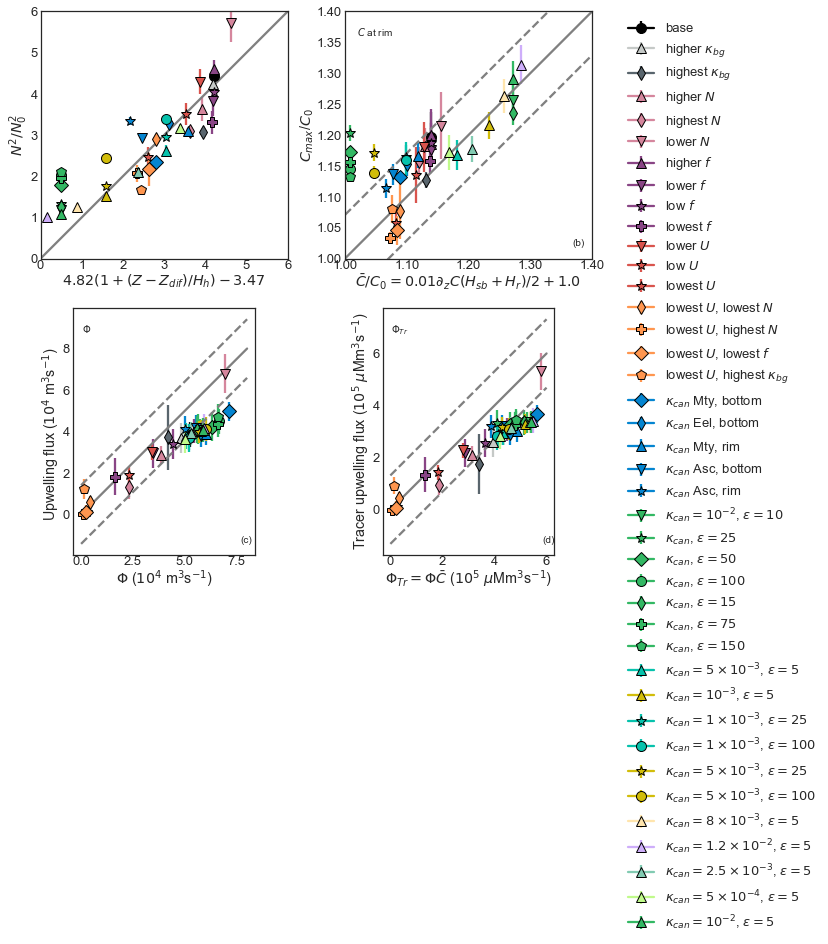

In [32]:
plt.rcParams['font.size'] = 8.0
f = plt.figure(figsize = (10,10)) # 190mm = 7.48 in, 230cm = 9.05in

gs = gspec.GridSpec(2, 2)
ax0 = plt.subplot(gs[0,0])
ax1 = plt.subplot(gs[0,1])
ax2 = plt.subplot(gs[1,0])
ax3 = plt.subplot(gs[1,1])

t=6.5 # days

# Tr

# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% N/No below %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

for rec in records_sel:
    
    plt1 = ax0.errorbar(rec.N_sc**2/(rec.N**2),rec.maxN/(rec.N**2),
                        yerr = rec.stdN/(rec.N**2), # since rec.N is a constant
                        marker = rec.mstyle,
                        markersize = 10,
                        color = sns.xkcd_rgb[rec.color2],
                        markeredgewidth=1.0,
                        markeredgecolor = 'k',
                        label=rec.label)
    
    ax0.set_ylabel('$N^2/N^2_0$',labelpad=0.5)
    ax0.set_xlabel(r'$4.82(1+(Z-Z_{dif})/H_h)-3.47$',labelpad=0.5)

ax0.plot(np.linspace(0, 7, 50),np.linspace(0, 7, 50),'-', color='0.5')
ax0.set_ylim(0,6)
ax0.set_xlim(0,6)
ax0.text(0.92,0.05,'(a)',transform=ax1.transAxes,fontsize=10)
ax0.text(0.05,0.9,'$N^2$ below rim',transform=ax1.transAxes,fontsize=10)
ax0.set_aspect(1)


# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% Tracer Conc %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
ax1.plot(np.linspace(1,1.4, 50),np.linspace(1,1.4, 50),'-', color='0.5')

for rec in records_sel:
    print(rec.name) 
    plt1 = ax1.errorbar(rec.Cbar/rec.TrSB,rec.maxTr/rec.TrSB,
                        yerr = rec.stdTr/rec.TrSB,
                        marker = rec.mstyle,
                        markersize = 10,
                        color = sns.xkcd_rgb[rec.color2],
                        markeredgewidth=1.0,
                        markeredgecolor = 'k',
                        label=rec.label)
    ax1.set_ylabel('$C_{max}$/$C_{0}$',labelpad=0.5)
    ax1.set_xlabel(r'$\bar{C}/C_{0}=%1.2f\partial_zC(H_{sb}+H_r)/2+%1.1f$' %((0.01),(1.00)),labelpad=0.5)

fmt = FormatStrFormatter('%1.2f')
ax1.xaxis.set_major_formatter(fmt)
ax1.yaxis.set_major_formatter(fmt)

ax1.tick_params(axis='x', pad=1)
ax1.tick_params(axis='y', pad=1)

maxN_array = np.array([rec.maxTr/rec.TrSB for rec in records_sel])
tilt_array = np.array([(0.01*(rec.dTrdz*(Hh+132.0)/2.0))+1.00 for rec in records_sel])
x_fit = np.linspace(1,1.4, 50)

mean_sq_err = np.mean(((maxN_array)-(tilt_array))**2)
upper_bound = ax1.plot(x_fit,x_fit+(mean_sq_err)**(0.5),linestyle = '--',color='0.5')
lower_bound = ax1.plot(x_fit,x_fit-(mean_sq_err)**(0.5),linestyle = '--',color='0.5')
print('The rms error for C/Co is %f' %mean_sq_err)

ax1.text(0.92,0.05,'(b)',transform=ax1.transAxes,fontsize=10)
ax1.text(0.05,0.9,'$C$ at rim',transform=ax1.transAxes,fontsize=10)

ax1.set_ylim(1,1.4)
ax1.set_xlim(1,1.4)
ax1.set_aspect(1)

# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%% Phi %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
t=4
for rec in records_sel:
    
    plt1 = ax2.errorbar(((slope*rec.HA2013)+intercept)/1E4,rec.Phi/1E4,
                        yerr=rec.Phi_std/1E4,
                        marker = rec.mstyle,
                        markersize = 10,
                        color = sns.xkcd_rgb[rec.color2],
                        markeredgewidth=1.0,
                        markeredgecolor = 'k',
                        label=rec.label)
    
ax2.set_ylabel(r'Upwelling flux ($10^4$ m$^3$s$^{-1}$)  ',labelpad=0.5)
ax2.set_xlabel(r'$\Phi$ ($10^4$ m$^3$s$^{-1}$)',labelpad=0.5)
    
maxN_array = np.array([rec.Phi/1E4 for rec in records_sel])
tilt_array = np.array([((slope*rec.HA2013)+intercept)/1E4 for rec in records_sel])
x_fit = np.linspace(0,8, 50)

mean_sq_err = np.mean(((maxN_array)-(tilt_array))**2)
upper_bound = ax2.plot(x_fit,x_fit+(mean_sq_err)**(0.5),linestyle = '--',color='0.5')
lower_bound = ax2.plot(x_fit,x_fit-(mean_sq_err)**(0.5),linestyle = '--',color='0.5')
print('The rms error for Phi is %f' %mean_sq_err)

ax2.plot(np.linspace(0,8, 50),np.linspace(0,8, 50),'-', color='0.5')
ax2.text(0.92,0.05,'(c)',transform=ax2.transAxes,fontsize=10)
ax2.text(0.05,0.9,'$\Phi$',transform=ax2.transAxes,fontsize=10)
    
#ax2.set_ylim(0,8)
#ax2.set_xlim(0,8)
ax2.set_aspect(1)

    # %%%%%%%%%%%%%%%%%%%%%%%%%%%%%% Phi_Tr %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%    
for rec in records_sel:    
    
    Capprox= rec.Cbar
    
    mass_can_eff = rec.TrMass
    can_eff = rec.HCW
    
    phiTr = np.mean(np.array([(mass_can_eff[ii]-mass_can_eff[ii-1])/(time[ii]-time[ii-1]) for ii in range (8,18)]))
    phiTr_std = np.std(np.array([(mass_can_eff[ii]-mass_can_eff[ii-1])/(time[ii]-time[ii-1]) for ii in range (8,18)]))
    
    plt1 = ax3.errorbar((slope*rec.HA2013+intercept)*(Capprox)/1E5, # 1000 is a conversion factor
                        (phiTr)/1E5,
                        yerr = phiTr_std/1E5,
                        marker = rec.mstyle,
                        markersize = 10,
                        color = sns.xkcd_rgb[rec.color2],
                        markeredgewidth=1.0,
                        markeredgecolor = 'k',
                        label=rec.label)
    rec.PhiTr = (phiTr)
    rec.PhiTrScale = (slope*rec.HA2013+intercept)*(Capprox)
     
ax3.set_xlabel(r'$\Phi_{Tr}=\Phi \bar{C}$ ($10^5$ $\mu$Mm$^{3}$s$^{-1}$)',labelpad=0.5)
ax3.set_ylabel(r'Tracer upwelling flux ($10^5$ $\mu$Mm$^{3}$s$^{-1}$)',labelpad=0.5)

maxN_array = np.array([rec.PhiTr/1E5 for rec in records_sel])
tilt_array = np.array([rec.PhiTrScale/1E5 for rec in records_sel])
x_fit = np.linspace(0,6, 50)

mean_sq_err = np.mean(((maxN_array)-(tilt_array))**2)
upper_bound = ax3.plot(x_fit,x_fit+(mean_sq_err)**(0.5),linestyle = '--',color='0.5')
lower_bound = ax3.plot(x_fit,x_fit-(mean_sq_err)**(0.5),linestyle = '--',color='0.5')
print('The rms error for PhiTr/1E5 above is %f' %mean_sq_err)

ax3.plot(np.linspace(0,6, 50),np.linspace(0,6, 50),'-', color='0.5')
ax3.text(0.93,0.05,'(d)',transform=ax3.transAxes,fontsize=10)
ax3.text(0.05,0.9,'$\Phi_{Tr}$',transform=ax3.transAxes,fontsize=10)

#ax3.set_ylim(0,6)
#ax3.set_xlim(0,6)
ax3.set_aspect(1)
    
ax1.legend(bbox_to_anchor=(1.1,1),ncol=1, columnspacing=0.1)
    
ax0.tick_params(axis='x', pad=1)
ax1.tick_params(axis='x', pad=1)
ax2.tick_params(axis='x', pad=1)
ax3.tick_params(axis='x', pad=1)

ax0.tick_params(axis='y', pad=3)
ax1.tick_params(axis='y', pad=3)
ax2.tick_params(axis='y', pad=3)
ax3.tick_params(axis='y', pad=3)

#plt.savefig('figure9.eps',format='eps',bbox_inches='tight')

print(rec.inidTrdz)

For (c) and (d): Used the scaled N below rim to calclulate $\Phi$ and $\Phi_{Tr}$. There are new constants to make it work. We don't get as much upwelling as the scaling predicts because there is a thick 'lid' of high stratifitaion on top of the canyon that prevents the water from upwelling. Cases with realistic or constant diffusivity have lower stratification above the rim as well, and so water can come up.